# 공간분석과 공간통계: 입지-배분 모형
#### 가천대학교 공간정보시스템(14842001) 장요한 (ycanns@gachon.ac.kr)
----------------------

#### 1. Initialization

In [6]:
import folium, math
from geopy.distance import geodesic
import matplotlib.pyplot as plt

### PART 1 ---- Simple example

##### 1.1. Sample demand and supply points

In [3]:
# Sample coordinate information
demand_points = [(5, 2), (3, 2), (5, 6), (7, 8)]  # Demand points (x, y) coordinates
supply_points = [(5, 5), (6, 6), (2, 2), (6, 4), (4, 7)]   # Supply points (x, y) coordinates


In [4]:
def visualize_points(demand_points, supply_points):
    # Extract x and y coordinates from the points
    demand_x, demand_y = zip(*demand_points)
    supply_x, supply_y = zip(*supply_points)

    # Plot demand and supply points
    plt.scatter(demand_x, demand_y, color='blue', label='Demand Points')
    plt.scatter(supply_x, supply_y, color='red', label='Supply Points')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Demand and Supply Points')
    plt.legend()
    plt.show()

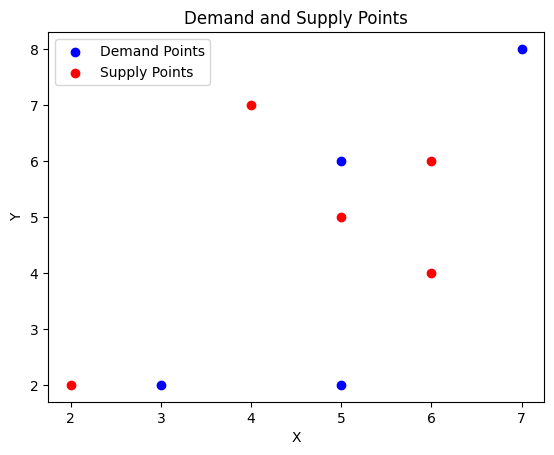

In [7]:
# Example usage
visualize_points(demand_points, supply_points)

##### 1.2. 두 포인트 간 거리계산 (Euclidean distance)

In [8]:
def calculate_distance(point1, point2):
    # Calculates the Euclidean distance between two points
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

##### 1.3. 주어진 수요(demand)와 공급(supply) 점 간 최소 좌표 찾기

In [9]:
def mindistance(point, points):
    # Finds the point with the minimum distance to a given point
    min_dist = float('inf')
    min_point = None

    for p in points:
        dist = calculate_distance(point, p)
        if dist < min_dist:
            min_dist = dist
            min_point = p

    return min_point

##### 1.4. 주어진 수요(demand)와 공급(supply) 점 간 최대 거리 찾기

In [10]:
def maxatten(point, points, max_dist):
    # Finds all points within a given maximum distance of a given point
    within_dist = []

    for p in points:
        dist = calculate_distance(point, p)
        if dist <= max_dist:
            within_dist.append(p)

    return within_dist

##### 1.5. 주어진 수요(demand)와 공급(supply) 점 간 최소 거리 찾기

In [11]:
def mindistpower(points1, points2):
    # Finds the minimum distance between two sets of points
    min_dist = float('inf')

    for p1 in points1:
        for p2 in points2:
            dist = calculate_distance(p1, p2)
            if dist < min_dist:
                min_dist = dist

    return min_dist

##### 1.6. 주어진 수요(demand)와 공급(supply) 점 간 최대 커버레이지(coverage) 거리 찾기

In [12]:
def maxcover(points1, points2):
    # Finds the maximum coverage distance between two sets of points
    max_dist = 0

    for p1 in points1:
        min_dist = float('inf')
        for p2 in points2:
            dist = calculate_distance(p1, p2)
            if dist < min_dist:
                min_dist = dist
        if min_dist > max_dist:
            max_dist = min_dist

    return max_dist

##### 1.7. 각 기준으로 비교해보기

In [13]:
# Example usage
demand_point = demand_points[3]
closest_supply_point = mindistance(demand_point, supply_points)
points_within_distance = maxatten(demand_point, supply_points, 5)
min_distance_between_sets = mindistpower(demand_points, supply_points)
max_coverage_distance = maxcover(demand_points, supply_points)

print("Closest supply point to demand point:", closest_supply_point)
print("Points within 5 units of demand point:", points_within_distance)
print("Minimum distance between demand and supply points:", min_distance_between_sets)
print("Maximum coverage distance between demand and supply points:", max_coverage_distance)

Closest supply point to demand point: (6, 6)
Points within 5 units of demand point: [(5, 5), (6, 6), (6, 4), (4, 7)]
Minimum distance between demand and supply points: 1.0
Maximum coverage distance between demand and supply points: 2.23606797749979


##### 1.8. 결과 확인

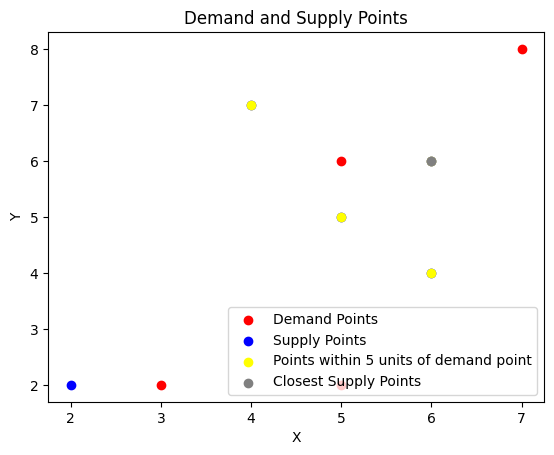

In [14]:
demand_x, demand_y = zip(*demand_points)
supply_x, supply_y = zip(*supply_points)
max_x, max_y = zip(*points_within_distance)


# Plot demand and supply points
plt.scatter(demand_x, demand_y, color='red', label='Demand Points')
plt.scatter(supply_x, supply_y, color='blue', label='Supply Points')
plt.scatter(max_x, max_y, color='yellow', label='Points within 5 units of demand point')
plt.scatter(closest_supply_point[0], closest_supply_point[1], color='gray', label='Closest Supply Points')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Demand and Supply Points')
plt.legend()
plt.show()

##### 원본과 함께...

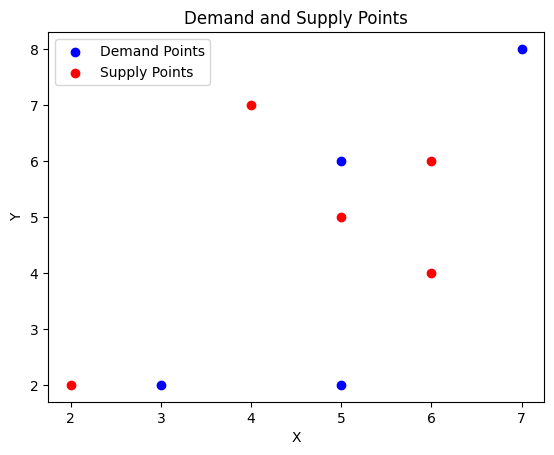

In [15]:
visualize_points(demand_points, supply_points)



---



### PART 12 ---- with GIS

##### 2.1. Sample demand and supply points

In [24]:
# 국내 5대 광역권 물류기지와 각 시도 좌표 중심점
supply_points = [(35.31962956, 126.7547121), (35.31146477, 129.0163972), (37.33105702, 126.9375047), (35.95864057, 128.4494975), (36.54418765, 127.3568226), (37.330421,   126.958047), (35.29484522, 129.0110754)]
demand_points = [(37.55724163, 126.9871252), (35.16218448, 129.054632), (35.85547861, 128.5793766), (37.46044164, 126.7004407), (35.1481661, 126.8521798), (36.34082679, 127.3987915), (35.5470358, 129.2569736), (37.45758953, 127.3429823), (37.8087934, 128.2723599), (36.76601606, 127.7690261), (36.54486254, 126.9145592), (35.73520285, 127.1688519), (34.87756336, 126.9620679), (36.16849991, 128.987314), (35.36637585, 128.2590894), (33.38684247, 126.5548156), (36.51783299, 127.2853503)]
# 해당 내용 샘플(https://library.krihs.re.kr/dl_image2/IMG/07/000000033018/SERVICE/000000033018_01.PDF)

In [ ]:
######## 새로운 창으로 확인할 것 !! ########
# 물류기지 등 시각화>> https://ycanns.github.io/Graphs/Logistic_Locations_v2.html
# 물류 물동량 시각화>> https://ycanns.github.io/Graphs/Logistic_OD_Visual_v2.html

##### 2.2. 주어진 수요(demand)와 공급(supply) 점 간 최소 거리 찾기


In [18]:
# Function to calculate the minimum distance between demand and supply points
def min_distance(demand, supply):
    min_dist = float('inf')
    for d in demand:
        for s in supply:
            dist = geodesic(d, s).miles
            if dist < min_dist:
                min_dist = dist
    return min_dist

##### 2.3. 주어진 수요(demand)와 공급(supply) 점 간 거리기준 최대 매력도 찾기


In [19]:
# Function to calculate the maximum attraction between demand and supply points
def max_attraction(demand, supply):
    max_att = 0
    for d in demand:
        for s in supply:
            dist = geodesic(d, s).miles
            att = 1 / dist  # Inverse distance as an example
            if att > max_att:
                max_att = att
    return max_att

##### 2.4. 주어진 수요(demand)와 공급(supply) 점 간 power를 기준으로 최단 거리 찾기


In [20]:
# Function to calculate the minimum distance with power between demand and supply points
def min_distance_power(demand, supply, power):
    min_dist_power = float('inf')
    for d in demand:
        for s in supply:
            dist = geodesic(d, s).miles
            dist_power = dist ** power
            if dist_power < min_dist_power:
                min_dist_power = dist_power
    return min_dist_power


##### 2.5. 주어진 수요(demand)와 공급(supply) 점 간 가장 짧은 이동거리를 가지는 좌표 찾기


In [21]:
# Function to calculate the minimum distance and the supply point associated with it
def min_distance_point(demand, supply):
    min_dist = float('inf')
    min_dist_point = None
    for d in demand:
        for s in supply:
            dist = geodesic(d, s).miles
            if dist < min_dist:
                min_dist = dist
                min_dist_point = s
    return min_dist, min_dist_point

##### 2.5. 주어진 수요(demand)와 공급(supply) 점 반경을 기준으로 최대 커버레이지(coverage) 찾기


In [22]:
# Function to calculate the maximum coverage by supply points
def max_coverage(demand, supply, radius):
    covered_demand = []
    for d in demand:
        for s in supply:
            dist = geodesic(d, s).miles
            if dist <= radius:
                covered_demand.append(d)
                break
    return covered_demand

##### 2.6. 각 기준으로 비교해보기

In [25]:
# Calculate and print the results
print("Minimum Distance:", min_distance(demand_points, supply_points))
print("Maximum Attraction:", max_attraction(demand_points, supply_points))
print("Minimum Distance with Power (power=2):", min_distance_power(demand_points, supply_points, 2))
min_dist, min_dist_point = min_distance_point(demand_points, supply_points)
print("Minimum Distance:", min_dist)
print("Closest Supply Point:", min_dist_point)
max_coverage_results = max_coverage(demand_points, supply_points, 50)
print("Maximum Coverage (radius=50 miles):", max_coverage_results)

Minimum Distance: 4.3727178925988985
Maximum Attraction: 0.22869071926468507
Minimum Distance with Power (power=2): 19.120661768254553
Minimum Distance: 4.3727178925988985
Closest Supply Point: (36.54418765, 127.3568226)
Maximum Coverage (radius=50 miles): [(37.55724163, 126.9871252), (35.16218448, 129.054632), (35.85547861, 128.5793766), (37.46044164, 126.7004407), (35.1481661, 126.8521798), (36.34082679, 127.3987915), (35.5470358, 129.2569736), (37.45758953, 127.3429823), (36.76601606, 127.7690261), (36.54486254, 126.9145592), (35.73520285, 127.1688519), (34.87756336, 126.9620679), (36.16849991, 128.987314), (35.36637585, 128.2590894), (36.51783299, 127.2853503)]


##### 2.7. 지도에 시각화 및 결과 확인 (Supply and Demand)

In [27]:
# Create a simple visualization using folium
map_center = (sum([c[0] for c in demand_points+supply_points])/len(demand_points+supply_points),
              sum([c[1] for c in demand_points+supply_points])/len(demand_points+supply_points))

# Create a map centered around the coordinates
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for demand points
for point in demand_points:
    folium.Marker(point, icon=folium.Icon(color='blue', icon='home'), name='demand points').add_to(m)
    
# Add markers for supply points
for point in supply_points:
    folium.Marker(point, icon=folium.Icon(color='red', icon='star'), name='supply points').add_to(m)
m

##### 2.8. 지도에 시각화 및 결과 확인 (Closest Points & Max Coverages)

In [28]:
# Add markers for Closest Supply Point
folium.Marker(min_dist_point, icon=folium.Icon(color='green', icon='bookmark')).add_to(m)

# Add markers for Maximum Coverage
for point in max_coverage_results:
    folium.Marker(point, icon=folium.Icon(color='gray', icon='info-sign')).add_to(m)
m

##### Question) 강원도를 Cover 하려면 어느만큼의 반경이 필요할까..?

### END CODE